In [1]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings

In [2]:
df = pd.read_csv('totalwithmaininfo.csv',sep=',')
df = df.drop(df.columns[0],axis=1)

In [3]:
train_percentage = 17/22
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [4]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [5]:
X_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]

In [6]:
X_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [7]:
def average(y_pred):
  for i in range(len(y_pred)):
    if i % 240 == 0 or (i+1) % 240 == 0:
      pass
    else: 
      average = float(y_pred[i-1] +  y_pred[i] + y_pred[i+1])/3
      if average >= 0.5:
        y_pred[i] = 1
      else:
        y_pred[i] = 0
  return y_pred

## 1. Logistic Regression

/home/visheshkkl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.7316666666666667, 0.7216940363007779, 0.7690888888888888]
[[921 279]
 [365 835]]


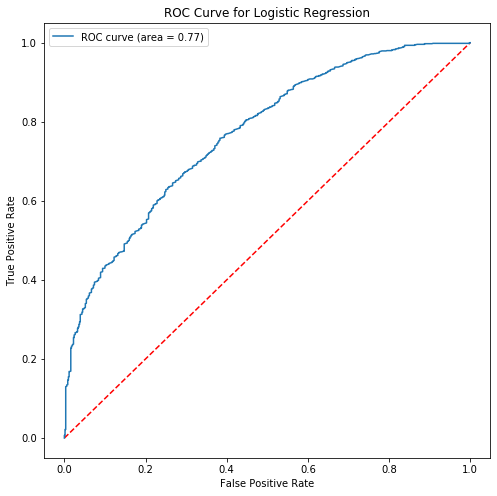

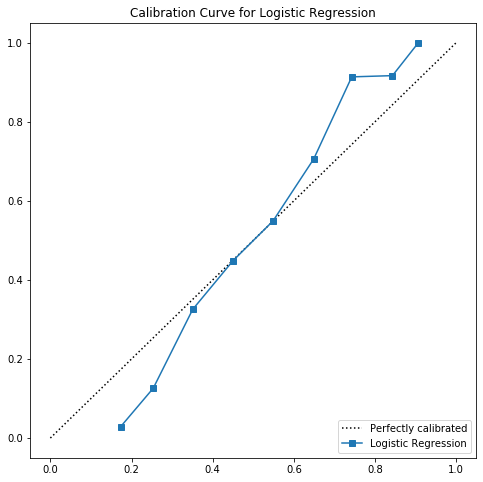

In [8]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)
y_pred_1 = average(y_pred_1)
y_score_1 = clf.predict_proba(X_test)[:,1]
acc1 = accuracy_score(y_test, y_pred_1)
f1_score_1 = metrics.f1_score(y_test, y_pred_1)
roc_1 = metrics.roc_auc_score(y_test, y_score_1)
print([acc1,f1_score_1,roc_1])
print(confusion_matrix(y_test, y_pred_1))


import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_test, y_score_1)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_1)
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_1,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Logistic Regression')
plt.legend(loc="lower right")
plt.title('Calibration Curve for Logistic Regression')
plt.savefig('checkdemo.eps', format='eps')

## 2. Naive Bayes

[0.6275, 0.6902286902286903, 0.5916055555555556]
[[510 690]
 [204 996]]


Text(0.5, 1.0, 'Calibration Curve for Naive Bayes')

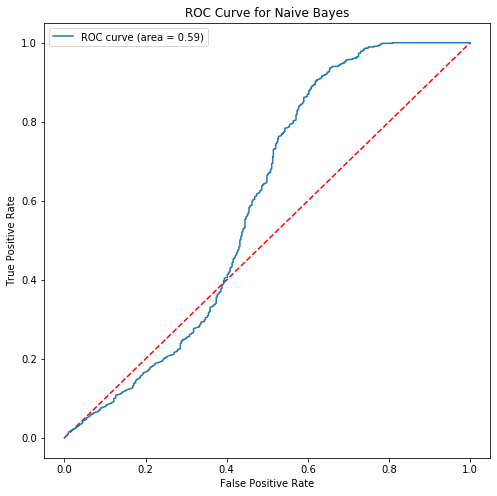

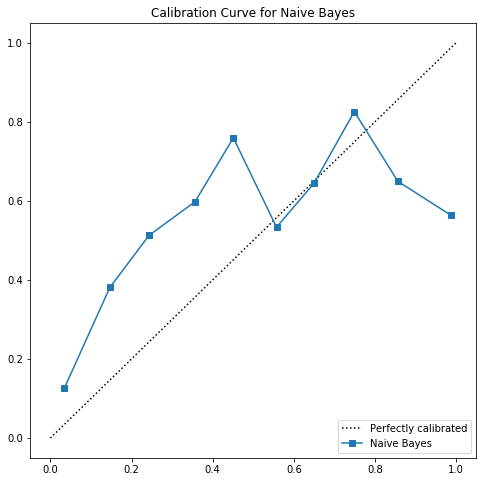

In [9]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
pred_NB = clf_NB.predict(X_test)
pred_NB = average(pred_NB)
y_score_2 = clf_NB.predict_proba(X_test)[:,1]
acc2 = accuracy_score(y_test, pred_NB)
f1_score_2 = metrics.f1_score(y_test, pred_NB)
roc_2 = metrics.roc_auc_score(y_test, y_score_2)
print([acc2,f1_score_2,roc_2])
print(confusion_matrix(y_test, pred_NB))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_test, y_score_2)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_2)
plt.title('ROC Curve for Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_2,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Naive Bayes')
plt.legend(loc="lower right")
plt.title('Calibration Curve for Naive Bayes')

## 3. KNN

In [11]:
acc3_list = []
f1_score3_list = []
roc_3_list = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    pred_KN = neigh.predict(X_test)
    pred_KN = average(pred_KN)
    y_score_3 = neigh.predict_proba(X_test)[:,1]
    acc3_list.append(accuracy_score(y_test, pred_KN))
    f1_score3_list.append(metrics.f1_score(y_test, pred_KN))
    roc_3_list.append(metrics.roc_auc_score(y_test, y_score_3))

In [12]:
acc3_list.index(max(acc3_list))+1

6

[0.7175, 0.6319218241042345, 0.7468902777777777]
[[1140   60]
 [ 618  582]]


Text(0.5, 1.0, 'Calibration Curve for KNN')

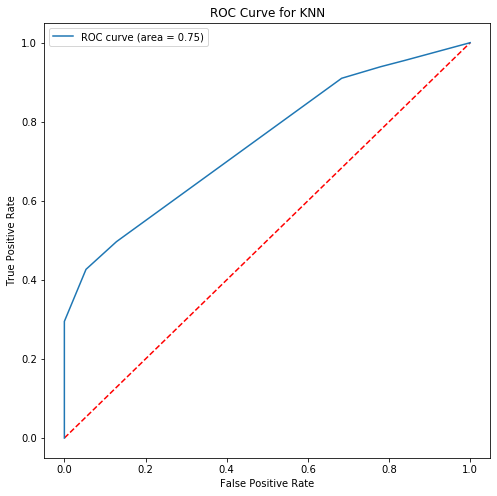

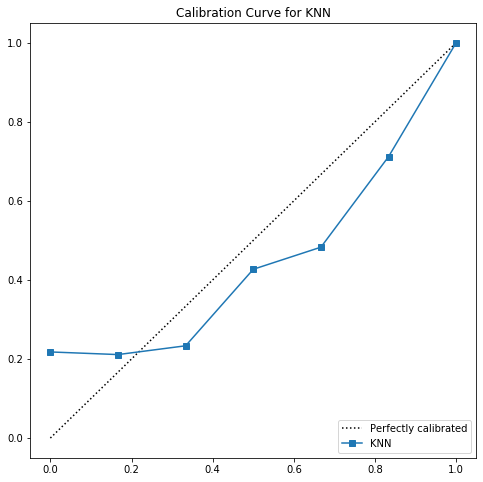

In [13]:
neigh = KNeighborsClassifier(n_neighbors=acc3_list.index(max(acc3_list))+1)
neigh.fit(X_train, y_train) 
pred_KN = neigh.predict(X_test)
pred_KN = average(pred_KN)
y_score_3 = neigh.predict_proba(X_test)[:,1]
acc3 = accuracy_score(y_test, pred_KN)
f1_score_3 = metrics.f1_score(y_test, pred_KN)
roc_3 = metrics.roc_auc_score(y_test, y_score_3)
print([acc3,f1_score_3,roc_3])
print(confusion_matrix(y_test, pred_KN))


import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_test, y_score_3)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_3)
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_3,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'KNN')
plt.legend(loc="lower right")
plt.title('Calibration Curve for KNN')

## 4. Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
acc5=[]
max_depth = []
for i in [2,3,4,5,6,7,8,9,10]:
    clf_DT = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf_DT.fit(X_train, y_train)
    pred_DT = clf_DT.predict(X_test)
    pred_DT = average(pred_DT)
    acc5.append(accuracy_score(pred_DT, y_test))
    max_depth.append(i)
print (max(acc5))

0.7191666666666666


In [15]:
 best_depth = max_depth[acc5.index(max(acc5))]

In [16]:
 best_depth

5

[0.7191666666666666, 0.7107296137339055, 0.7717645833333333]
[[898 302]
 [372 828]]


Text(0.5, 1.0, 'Calibration Curve for Decision Tree')

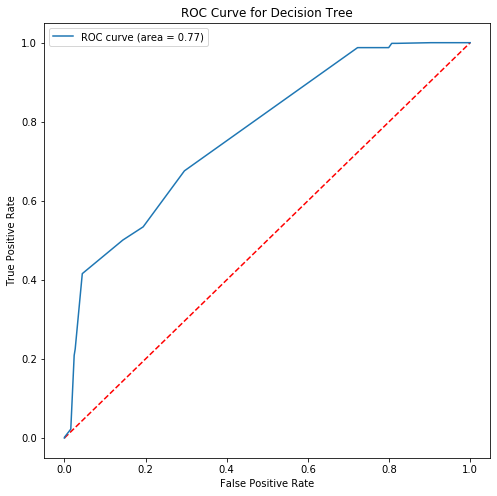

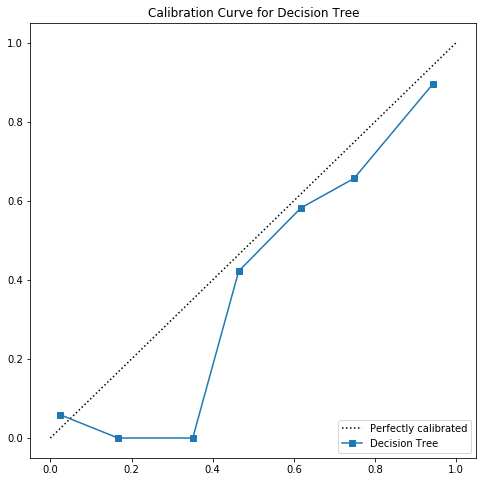

In [17]:
clf_DT = DecisionTreeClassifier(random_state=0, max_depth = best_depth)
clf_DT.fit(X_train, y_train)
pred_DT = clf_DT.predict(X_test)
pred_DT = average(pred_DT)
y_score_5 = clf_DT.predict_proba(X_test)[:,1]
acc5 = accuracy_score(y_test, pred_DT)
f1_score_5 = metrics.f1_score(y_test, pred_DT)
roc_5 = metrics.roc_auc_score(y_test, y_score_5)
print([acc5,f1_score_5,roc_5])
print(confusion_matrix(y_test, pred_DT))



import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_test, y_score_5)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_5)
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_5,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Decision Tree')
plt.legend(loc="lower right")
plt.title('Calibration Curve for Decision Tree')

## 6. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
acc6=[]
max_depth = []
for i in range(1,10):
    clf_RF = RandomForestClassifier(max_depth=i)
    clf_RF.fit(X_train, y_train) 
    pred_RF = clf_RF.predict(X_test)
    pred_RF = average(pred_RF)
    acc6.append(accuracy_score(pred_RF, y_test))
    max_depth.append(i)
print (max(acc6))

/home/visheshkkl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/visheshkkl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/visheshkkl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/visheshkkl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/visheshkkl/anaconda3/l

0.7183333333333334


/home/visheshkkl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/visheshkkl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/visheshkkl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
best_depth_6 = max_depth[acc6.index(max(acc6))]

In [20]:
best_depth_6

8

[0.675, 0.7352342158859471, 0.7993958333333333]
[[ 537  663]
 [ 117 1083]]


/home/visheshkkl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'Calibration Curve for Random Forest')

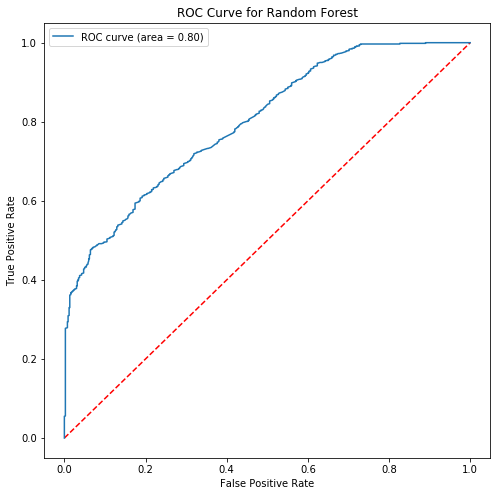

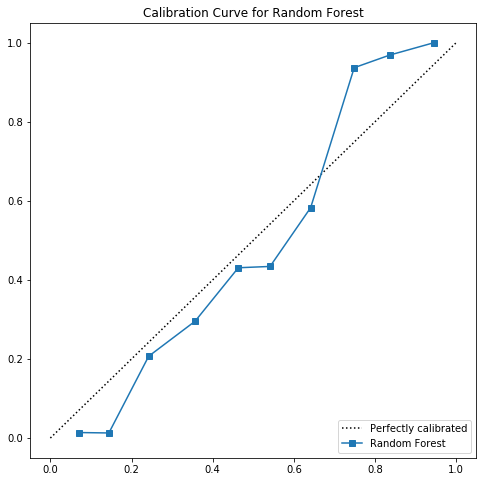

In [21]:
clf_RF = RandomForestClassifier(max_depth=best_depth_6)
clf_RF.fit(X_train, y_train) 
pred_RF = clf_RF.predict(X_test)
pred_RF = average(pred_RF)
y_score_6 = clf_RF.predict_proba(X_test)[:,1]
acc6 = accuracy_score(y_test, pred_RF)
f1_score_6 = metrics.f1_score(y_test, pred_RF)
roc_6 = metrics.roc_auc_score(y_test, y_score_6)
print([acc6,f1_score_6,roc_6])
print(confusion_matrix(y_test, pred_RF))

feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)


import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_test, y_score_6)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_6)
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_6,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Random Forest')
plt.legend(loc="lower right")
plt.title('Calibration Curve for Random Forest')

In [23]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier

clf_XGB = XGBClassifier()
clf_XGB.fit(X_train, y_train)
pred_XGB = clf_XGB.predict(X_test)
pred_XGB = average(pred_XGB)
y_score_8 = clf_XGB.predict_proba(X_test)[:,1]
acc8 = accuracy_score(y_test,pred_XGB)
f1_score_8 = metrics.f1_score(y_test, pred_XGB)
roc_8 = metrics.roc_auc_score(y_test, y_score_8)
print([acc8,f1_score_8,roc_8])
print(confusion_matrix(y_test, pred_XGB))

[0.7033333333333334, 0.734921816827997, 0.8318805555555555]
[[701 499]
 [213 987]]


In [24]:
feature_importances

,importance
MAR_N,0.237938
MAR,0.168867
MOE,0.159759
MOE_N,0.130036
Circularity,0.112266
EAR_N,0.082072
Circularity_N,0.057905
EAR,0.051157


In [25]:
X_train_shaped = np.expand_dims(X_train, axis=2)

In [26]:
X_train_shaped.shape

(8160, 8, 1)

In [27]:
X_test_shaped = np.expand_dims(X_test, axis=2)

In [28]:
X_test_shaped.shape

(2400, 8, 1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D
from keras.optimizers import Adam, RMSprop
from keras.layers import Dropout

model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (8,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


## Compile Model ##
optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train Model and Check Validation Accuracy ##
model.fit(X_train_shaped, y_train, validation_data = (X_test_shaped,y_test), epochs = 100)

Epoch 1/100
255/255 [==============================] - 2s 8ms/step - loss: 0.7309 - accuracy: 0.4328 - val_loss: 0.7687 - val_accuracy: 0.4150
Epoch 2/100
255/255 [==============================] - 1s 5ms/step - loss: 0.6917 - accuracy: 0.5496 - val_loss: 0.7530 - val_accuracy: 0.5650
Epoch 3/100
255/255 [==============================] - 1s 4ms/step - loss: 0.6774 - accuracy: 0.6034 - val_loss: 0.7375 - val_accuracy: 0.5850
Epoch 4/100
255/255 [==============================] - 1s 5ms/step - loss: 0.6572 - accuracy: 0.6344 - val_loss: 0.7208 - val_accuracy: 0.5950
Epoch 5/100
255/255 [==============================] - 2s 6ms/step - loss: 0.6472 - accuracy: 0.6472 - val_loss: 0.6926 - val_accuracy: 0.6000
Epoch 6/100
255/255 [==============================] - 2s 6ms/step - loss: 0.6366 - accuracy: 0.6603 - val_loss: 0.6837 - val_accuracy: 0.6017
Epoch 7/100
255/255 [==============================] - 1s 6ms/step - loss: 0.6308 - accuracy: 0.6656 - val_loss: 0.6725 - val_accuracy: 0.6075

Epoch 58/100
255/255 [==============================] - 1s 4ms/step - loss: 0.5305 - accuracy: 0.7346 - val_loss: 0.6358 - val_accuracy: 0.6558
Epoch 59/100
255/255 [==============================] - 1s 3ms/step - loss: 0.5324 - accuracy: 0.7362 - val_loss: 0.6373 - val_accuracy: 0.6533
Epoch 60/100
255/255 [==============================] - 1s 4ms/step - loss: 0.5277 - accuracy: 0.7434 - val_loss: 0.6366 - val_accuracy: 0.6508
Epoch 61/100
255/255 [==============================] - 1s 5ms/step - loss: 0.5271 - accuracy: 0.7392 - val_loss: 0.6355 - val_accuracy: 0.6508
Epoch 62/100
255/255 [==============================] - 1s 4ms/step - loss: 0.5241 - accuracy: 0.7458 - val_loss: 0.6365 - val_accuracy: 0.6550
Epoch 63/100
255/255 [==============================] - 1s 4ms/step - loss: 0.5282 - accuracy: 0.7396 - val_loss: 0.6368 - val_accuracy: 0.6475
Epoch 64/100
255/255 [==============================] - 1s 3ms/step - loss: 0.5243 - accuracy: 0.7455 - val_loss: 0.6367 - val_accuracy:

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 64)             256       
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                12320     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
____________________________________________________

In [31]:
pred_cnn = model.predict_classes(X_test_shaped)
pred_cnn = average(pred_cnn)
y_score_7 = model.predict_proba(X_test_shaped)
acc7 = accuracy_score(y_test, np.array(pred_cnn))
f1_score_7 = metrics.f1_score(y_test, pred_cnn)
roc_7 = metrics.roc_auc_score(y_test, y_score_7)
print([acc7,f1_score_7,roc_7])
print(confusion_matrix(y_test, pred_cnn))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
[0.6533333333333333, 0.7138927097661624, 0.73745625]
[[ 530  670]
 [ 162 1038]]


,Accuracy
Model,
Logistic Regression,0.731667
Naive Bayes,0.627500
KNN,0.717500
Decision Tree,0.719167
Random Forest,0.675000
CNN,0.653333
XGB Boosting,0.703333


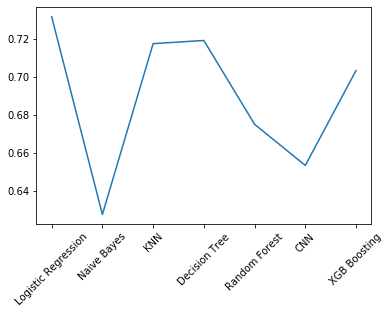

In [33]:
acc_total = {'Model':['Logistic Regression','Naive Bayes', 'KNN', 'Decision Tree','Random Forest', 'CNN', 'XGB Boosting'],
        'Accuracy':[acc1,acc2, acc3, acc5,acc6,acc7, acc8]}
acc_total=pd.DataFrame(acc_total)
acc_total=acc_total.set_index('Model')
acc_total
plt.plot(acc_total['Accuracy'])
plt.xticks(rotation=45)
acc_total

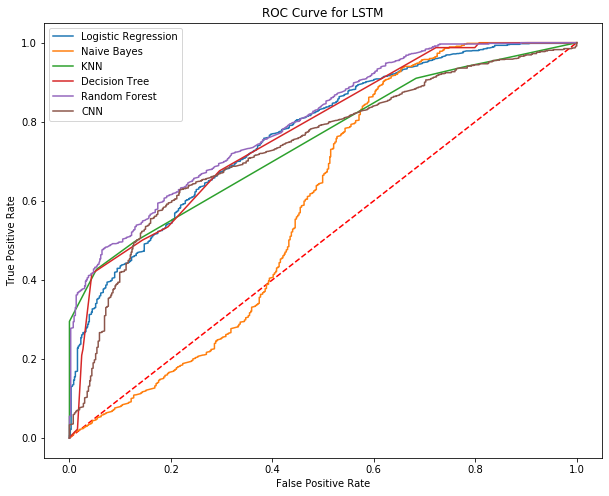

In [35]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1],'r--')
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_score_1)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_score_2)
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_score_3)
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_score_5)
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_score_6)
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_score_7)
plt.plot(fpr_1, tpr_1, label= "Logistic Regression")
plt.plot(fpr_2, tpr_2, label= "Naive Bayes")
plt.plot(fpr_3, tpr_3, label= "KNN")
plt.plot(fpr_5, tpr_5, label= "Decision Tree")
plt.plot(fpr_6, tpr_6, label= "Random Forest")
plt.plot(fpr_7, tpr_7, label= "CNN")
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

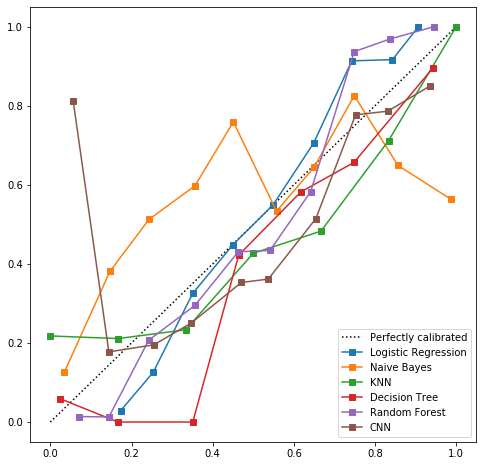

In [37]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_1,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Logistic Regression')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_2,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Naive Bayes')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_3,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'KNN')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_5,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Decision Tree')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_6,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Random Forest')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_7,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'CNN')
plt.legend(loc="lower right")